In [1]:
!pip install tensorflow


In [57]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## Loading the Data-Recognizer Dataset

In [58]:
train_data = pd.read_csv(r'C:\Users\RICHA\Downloads\digit-recognizer\train.csv')
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
test_data = pd.read_csv(r'C:\Users\RICHA\Downloads\digit-recognizer\test.csv')
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
train_data.shape

(42000, 785)

In [61]:
test_data.shape

(28000, 784)

In [62]:
x_train = train_data.drop(['label'],axis = 1).astype('int32')
y_train = train_data['label'].astype('float32')
x_test = test_data.astype('float32')
x_train.shape, y_train.shape,x_test.shape

((42000, 784), (42000,), (28000, 784))

In [63]:
#plt.imshow(x_train[0])

In [64]:
#plt.imshow(x_train[0],cmap= plt.cm.binary)

In [65]:
#Before Normalization
#print(x_train[0])

## Resizing And Normalizing The Data | PreProcessing Step

In [66]:
x_train = x_train.values.reshape(-1,28,28,1)         # Increasing one dimension for kernel = filter operation
x_train = x_train / 255.0
x_test = x_test.values.reshape(-1,28,28,1)
x_test = x_test / 255.0
x_train.shape, x_test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

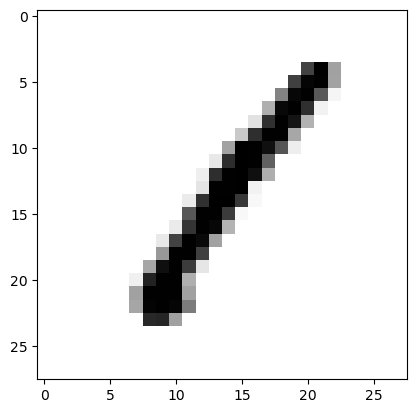

In [67]:
plt.imshow(x_train[0],cmap= plt.cm.binary)

In [68]:
#After Normalization ( Values are between 0 to 1)
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [69]:
print(y_train[0])

1.0


In [70]:
#One Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train,10)
y_train.shape
     

(42000, 10)

In [71]:
#Printing original labels of top 5 rows
print(train_data['label'].head())

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


In [72]:
#One hot encoding of the same labels
print(y_train[0:5,:])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Creating Deep Learning Neural Network

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [77]:
# Creating Neural Network
model = Sequential()

# First Convolution Layer
model.add(Conv2D(64,(3,3),input_shape=(28,28,1)))            #Only for 1st convolution layer to mention input layer
model.add(Activation("relu"))                                # Activation function to make it non-linera, if <0:remove, >0:pass
model.add(MaxPooling2D(pool_size=(2,2)))                     # MaxPooling: single maximum value of 2*2

# Second Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Third Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully connected layer 1
model.add(Flatten())                                        # Before using fully connected, need to flatten to convert 2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))

# Fully connected layer 2
model.add(Dense(64))
model.add(Activation("relu"))

# Last fully connected layer,output must be equal to number of classes, 10 (0-9)
model.add(Dense(10))                                       # This last dense layer must be equal to 10
model.add(Activation("softmax"))                            # Activation function is changed to Softmax (class probabilities)


In [78]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_3 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_4 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [79]:
#Defining the callback function to stop our training once the acceptable accuracy is reached
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy') > 0.999):
                print("\nReached 99.9% accuracy so cancelling training!")
                self.model.stop_training = True
    
callbacks = myCallback()

In [80]:
print("Total Training Samples=",len(x_train))

Total Training Samples= 42000


In [84]:
model.compile(loss="categorical_crossentropy", optimizer = 'adam',metrics=['accuracy'])

In [85]:
model.fit(x_train,y_train,validation_split=0.3, batch_size = 50, epochs = 20, callbacks=[callbacks])

# Validation accuracy 30< accuracy 98 ; overfitting=> solution is dropout

Epoch 1/20
588/588 [==============================] - 38s 63ms/step - loss: 0.3821 - accuracy: 0.8784 - val_loss: 0.1708 - val_accuracy: 0.9433
Epoch 2/20
588/588 [==============================] - 40s 68ms/step - loss: 0.1193 - accuracy: 0.9648 - val_loss: 0.1092 - val_accuracy: 0.9657
Epoch 3/20
588/588 [==============================] - 39s 66ms/step - loss: 0.0849 - accuracy: 0.9737 - val_loss: 0.1057 - val_accuracy: 0.9668
Epoch 4/20
588/588 [==============================] - 37s 63ms/step - loss: 0.0620 - accuracy: 0.9815 - val_loss: 0.0612 - val_accuracy: 0.9815
Epoch 5/20
588/588 [==============================] - 40s 68ms/step - loss: 0.0531 - accuracy: 0.9834 - val_loss: 0.0703 - val_accuracy: 0.9790
Epoch 6/20
588/588 [==============================] - 41s 69ms/step - loss: 0.0443 - accuracy: 0.9852 - val_loss: 0.0564 - val_accuracy: 0.9823
Epoch 7/20
588/588 [==============================] - 41s 70ms/step - loss: 0.0355 - accuracy: 0.9886 - val_loss: 0.0798 - val_accuracy:

In [86]:
results = model.predict(x_test)
print(results)

875/875 [==============================] - 12s 14ms/step
[[2.0566547e-15 5.0260119e-17 1.0000000e+00 ... 4.4246772e-16
  9.9206648e-16 2.3368901e-20]
 [1.0000000e+00 8.0753899e-23 9.4528708e-12 ... 6.1299799e-13
  6.6305095e-15 1.4334152e-11]
 [2.0135363e-10 3.9509077e-11 1.6831998e-11 ... 5.7168574e-08
  4.2635065e-08 9.9999988e-01]
 ...
 [5.8404708e-17 9.0359449e-14 1.4403138e-14 ... 7.3502538e-13
  3.9815776e-14 1.7498354e-13]
 [2.1364437e-08 5.4725433e-09 1.7156618e-09 ... 1.3772880e-05
  1.3392563e-09 9.9998569e-01]
 [2.2644431e-16 4.5513855e-20 1.0000000e+00 ... 1.3162446e-14
  3.0511689e-14 2.3173136e-22]]


In [ ]:
print()

In [87]:
# select the index with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [88]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission.csv",index=False)